<a href="https://colab.research.google.com/github/AlexMan2000/DS-GA-Capstone/blob/master/GPT_VLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages

In [ ]:
!pip install openai
!pip install datasets
from openai import OpenAI
from PIL import Image
import io
import base64

In [ ]:
# Install httpx version 0.27.2
!pip uninstall -y httpx
!pip install httpx==0.27.2

# Verify the installation and version
import httpx
print("httpx version:", httpx.__version__)


Found existing installation: httpx 0.27.2
Uninstalling httpx-0.27.2:
  Successfully uninstalled httpx-0.27.2
  Using cached httpx-0.27.2-py3-none-any.whl.metadata (7.1 kB)
Using cached httpx-0.27.2-py3-none-any.whl (76 kB)
httpx version: 0.27.2


In [ ]:
# Function to encode the image
def encode_image(image_path):
  with open(image_path, 'rb') as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

def single_image(image_path, system_prompt, user_prompt):
  client = OpenAI(
      api_key=openai_key,
  )
  # Getting the base64 string
  base64_image = encode_image(image_path)

  response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": system_prompt},
      {
        "role": "user",
        "content": [
          {"type": "text", "text": user_prompt},
          {
            "type": "image_url",
            "image_url": {
              'url': f"data:image/jpeg;base64,{base64_image}",
            },
          },
        ],
      }
    ],
    max_tokens=300,
  )
  print(response.choices[0])

def two_images(image1, image2, system_prompt, user_prompt):
    client = OpenAI(
      # This is the default and can be omitted
      api_key=openai_key,
  )
    # Encode both images in base64
    base64_image_1 = encode_image(image1)
    base64_image_2 = encode_image(image2)

    response = client.chat.completions.create(
      model="gpt-4o-mini",
      messages=[
          {"role": "system", "content": system_prompt},
        {
          "role": "user",
          "content": [
            {"type": "text", "text": user_prompt},
            {
              "type": "image_url",
              "image_url": {
                'url': f"data:image/jpeg;base64,{base64_image_1}",
              },
            },
            {
              "type": "image_url",
              "image_url": {
                'url': f"data:image/jpeg;base64,{base64_image_2}",
              },
            },
          ],
        }
      ],
      max_tokens=300,
    )
    return response.choices[0]

## Basic usuage

In [ ]:
# Function to encode the image
def encode_image(image_path):
  with open(image_path, 'rb') as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

In [ ]:
system_prompt = '''You are an visual assistant designed to help fully blind users understand the world around them through text prompts, the camera on their smartphone, and radar information (depth map) from the phone.
Your primary goal is to provide clear, helpful, and patient guidance. Focus on describing what is in the image, and carefully interpret the user's intent from their prompt. Ensure that your responses are concise yet informative, helping the user understand the situation they are facing.
Always prioritize the user's needs and ensure that your guidance is easy to follow. Also, let the user know if there are any potential hazards or obstacles that the person should be aware of.'''

In [ ]:
user_prompt = "What are the main objects visible in the image? List the names of the main objects and describe the scene in one sentence."

In [ ]:
def single_image(image_path, system_prompt, user_prompt):
  client = OpenAI(
      api_key=openai_key,
  )
  # Getting the base64 string
  base64_image = encode_image(image_path)

  response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": system_prompt},
      {
        "role": "user",
        "content": [
          {"type": "text", "text": user_prompt},
          {
            "type": "image_url",
            "image_url": {
              'url': f"data:image/jpeg;base64,{base64_image}",
            },
          },
        ],
      }
    ],
    max_tokens=300,
  )
  print(response.choices[0])

In [ ]:
def single_image_original(image_path, system_prompt, user_prompt):
  client = OpenAI(
      api_key=openai_key,
  )
  # Getting the base64 string
  response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": system_prompt},
      {
        "role": "user",
        "content": [
          {"type": "text", "text": user_prompt},
          {
            "type": "image_url",
            "image_url": {
              'url': f"data:image/jpeg;base64,{image_path}",
            },
          },
        ],
      }
    ],
    max_tokens=300,
  )
  print(response.choices[0])

 Response = "To guide you to the Wall Street Subway Station:\n\n1. **Check your surroundings**: If you're facing the entrance of the subway station in the image, you should see the green subway pillars and some people nearby.\n\n 2. **Direction**: If you're currently in front of the subway entrance, proceed straight ahead towards the entrance.\n\n3. **Distance**: The subway entrance is just a few steps away from where you are standing, so you should arrive in about 10 to 15 seconds of walking straight.\n\n4. **Caution**: Be aware of pedestrians around you as you approach the entrance.\n\nIf you need any more assistance, feel free to ask!"

## Examples

In [ ]:
client = OpenAI(
    # This is the default and can be omitted
    api_key=openai_key,
)


# Path to your image
image_path = "/content/subway_station.jpeg"

# Getting the base64 string
base64_image = encode_image(image_path)


system_prompt = '''You are an assistant designed to help fully blind users understand the world around them through their text prompts, the camera on their smartphone, and radar information (depth map) from the phone.
Your primary goal is to provide clear, helpful, and patient guidance. Focus on describing what is in the image in general, and carefully interpret the user's intent from their prompt. Ensure that your responses are concise yet informative, helping the user navigate their surroundings or understand the situation they are facing.
Always prioritize the user's needs and ensure that your guidance is easy to follow. Also, let the user know if there are any potential hazards or obstacles that the person should be aware of along the way.'''

user_prompt = "I am standing on the street and I want to go to the subway station. Please guide me with directions, telling me if I should go left or right and how long I need to walk."
image_path = "/content/subway_station.jpeg"

response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
       {"role": "system", "content": system_prompt},
    {
      "role": "user",
      "content": [
        {"type": "text", "text": user_prompt},
        {
          "type": "image_url",
          "image_url": {
            'url': f"data:image/jpeg;base64,{base64_image}",
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0])



FileNotFoundError: [Errno 2] No such file or directory: '/content/subway_station.jpeg'

## Indoor images

In [ ]:
from datasets import load_from_disk
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = load_from_disk("/content/drive/MyDrive/nyu_depth_v2_train")

Loading dataset from disk:   0%|          | 0/157 [00:00<?, ?it/s]

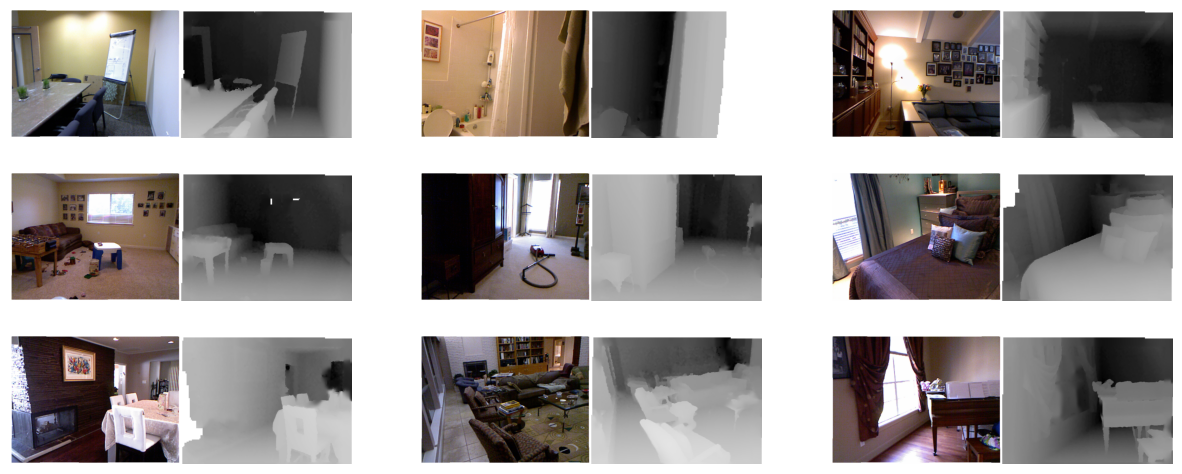

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# Directory for saving images
save_dir = "ds"
os.makedirs(save_dir, exist_ok=True)
# train_set = ds
# random_indice = np.random.choice(len(train_set), 9).tolist()[0]
# image, depth = train_set[idx]["image"], train_set[idx]["depth_map"]


# Function to generate a colored depth map
def colored_depthmap(depth, d_min=None, d_max=None, mode="gray"):
    if d_min is None:
        d_min = np.min(depth)
    if d_max is None:
        d_max = np.max(depth)
    depth_relative = (depth - d_min) / (d_max - d_min)

    if mode == "gray":
        depth_inverted = 1 - depth_relative
        depth_gray = (depth_inverted * 255).astype(np.uint8)
        return np.stack([depth_gray] * 3, axis=-1)
    elif mode == "color":
        cmap = plt.cm.viridis
        return (255 * cmap(depth_relative)[:, :, :3]).astype(np.uint8)
    else:
        raise ValueError("Mode can only be gray or color")

# Function to merge the original image and depth map side-by-side
def merge_into_row(input_image, depth_target):
    if not isinstance(input_image, np.ndarray):
        input_image = np.array(input_image)
    d_min = np.min(depth_target)
    d_max = np.max(depth_target)
    depth_target_col = colored_depthmap(depth_target, d_min, d_max)
    img_merge = np.hstack([input_image, depth_target_col])
    return img_merge

# Setting up the dataset and selecting random images
train_set = dataset
np.random.seed(42)
random_indices = np.random.choice(len(train_set), 9).tolist()

plt.figure(figsize=(15, 6))

# Process each selected image and depth map
for i, idx in enumerate(random_indices):
    ax = plt.subplot(3, 3, i + 1)
    example = train_set[idx]

    # Get the image and depth map
    input_image = train_set[idx]["image"]
    depth_map = train_set[idx]["depth_map"]

    # Merge images for display
    image_viz = merge_into_row(input_image, depth_map)
    plt.imshow(image_viz.astype("uint8"))
    plt.axis("off")

    # Save the original image
    # image = Image.fromarray(input_image.astype("uint8"))
    # image.save(os.path.join(save_dir, f"original_image_{idx}.png"))

    # # Save the depth map as a color image
    # depth_colored = colored_depthmap(depth_map)
    # depth_image = Image.fromarray(depth_colored)
    # depth_image.save(os.path.join(save_dir, f"depth_map_{idx}.png"))

plt.show()


## Indoor images with GPT-4o

In [ ]:
from typing import List
import base64
import openai

# Function to encode image to base64
def encode_image(image_path: str) -> str:
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode("utf-8")

# Function to process two images for a single prompt with OpenAI model
def process_two_images_with_prompt(api_key: str, image_paths: List[str], user_prompt: str,stream_mode=False) -> str:
    client = OpenAI(
      # This is the default and can be omitted
      api_key=openai_key,
  )

    # Ensure exactly two images are provided
    if len(image_paths) != 2:
        raise ValueError("Please provide exactly two image paths.")

    # Encode both images in base64

    base64_image_1 = encode_image(image_paths[0])
    base64_image_2 = encode_image(image_paths[1])

    # Make a request to the OpenAI model with both images
#     response = client.chat.completions.create(
#     model="gpt-4o-mini",
#     messages=[
#         {"role": "system", "content": system_prompt},
#         {"role": "user", "content": user_prompt},
#         {"role": "user", "content": "Here's the camera image for reference:" + base64_image_1},
#         {"role": "user", "content": "Here's the depth map for reference:" + base64_image_2}
#     ],
#     max_tokens=300,
# )

    response = client.chat.completions.create(
      model="gpt-4o-mini",
      messages=[
          {"role": "system", "content": system_prompt},
        {
          "role": "user",
          "content": [
            {"type": "text", "text": user_prompt},
            {
              "type": "image_url",
              "image_url": {
                'url': f"data:image/jpeg;base64,{base64_image_1}",
              },
            },
            {
              "type": "image_url",
              "image_url": {
                'url': f"data:image/jpeg;base64,{base64_image_2}",
              },
            },
          ],
        }
      ],
      stream = stream_mode,
      max_tokens=300,
    )


    # Extract and return the response
    return response.choices[0]

In [ ]:
# Usage example:
image_paths = ["/content/indoor/bathroom_1.png", "/content/indoor/bathroom_depth_1.png"]
user_prompt = "I wanna brush my teeth. Please guide me with directions, telling me if I should go left or right for how many steps."

result = process_two_images_with_prompt(openai_key, image_paths, user_prompt)
print(result)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='To help you brush your teeth, please follow these directions:\n\n1. **Start Facing Forward**: Make sure you are facing the doorway of the bathroom.\n2. **Go Straight**: Take about 5 steps forward.\n3. **Turn Left**: After you’ve taken those steps, turn left.\n4. **Walk Straight**: Walk straight for about 3 steps, and you should reach the sink.\n\nMake sure to feel around for any obstacles as you move, and let me know if you need further assistance!', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


content='To help you brush your teeth, please follow these directions:\n\n1. **Start Facing Forward**: Make sure you are facing the doorway of the bathroom.\n2. **Go Straight**: Take about 5 steps forward.\n3. **Turn Left**: After you’ve taken those steps, turn left.\n4. **Walk Straight**: Walk straight for about 3 steps, and you should reach the sink.\n\nMake sure to feel around for any obstacles as you move, and let me know if you need further assistance!'

In [ ]:
# Usage example:
image_paths = ["/content/indoor/livingroom_1.png", "/content/indoor/livingroom_depth_1.png"]
user_prompt = "Am I in the living room? If so, I want to take a seat. Find an empty seat if possible, and guide me if I should go left or right for how many steps."

result = process_two_images_with_prompt(openai_key, image_paths, user_prompt)
print(result)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="It appears you're in a meeting room rather than a living room. There are some chairs around a table, but I can't confirm if any are specifically empty.\n\nTo help guide you, please tell me your starting position (facing) and I'll advise you on the best direction to take to find a seat.", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


content="It appears you're in a meeting room rather than a living room. There are some chairs around a table, but I can't confirm if any are specifically empty.\n\nTo help guide you, please tell me your starting position (facing) and I'll advise you on the best direction to take to find a seat."

In [ ]:
# Usage example:
image_paths = ["/content/indoor/livingroom_2.png", "/content/indoor/livingroom_depth_2.png"]
user_prompt = "Where am I facing? I want to sit in the sofa. Use the depth map and guide me if I should go left or right for how many steps."

result = process_two_images_with_prompt(openai_key, image_paths, user_prompt)
print(result)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Based on the images, it appears you're in a living room facing towards the couch, which is on your left. There’s a coffee table in front of you, and some items on the floor, likely toys.\n\nTo get to the sofa:\n\n1. **Take one step forward** towards the coffee table.\n2. **Turn left (towards the couch).** \n3. **Take about two steps** to reach the sofa.\n\nStay aware of the floor space as you move, and watch for any obstacles.", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


content="Based on the images, it appears you're in a living room facing towards the couch, which is on your left. There’s a coffee table in front of you, and some items on the floor, likely toys.\n\nTo get to the sofa:\n\n1. **Take one step forward** towards the coffee table.\n2. **Turn left (towards the couch).** \n3. **Take about two steps** to reach the sofa.\n\nStay aware of the floor space as you move, and watch for any obstacles."

In [ ]:
# Usage example:
image_paths = ["/content/indoor/livingroom_3.png", "/content/indoor/livingroom_depth_3.png"]
user_prompt = "Where am I? I wanna go to the bathroom. Use the depth map and guide me if I should go left or right for how many steps."

result = process_two_images_with_prompt(openai_key, image_paths, user_prompt)
print(result)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Based on the depth map, you're currently in a room with furniture scattered around, including couches and chairs. \n\nTo find the bathroom:\n\n1. **Turn right**. \n2. **Walk forward about 6 steps**. This should take you closer to the bathroom.\n\nBe cautious of the furniture as you move. If you encounter any obstacles, adjust your path accordingly.", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Based on the depth map, you're currently in a room with furniture scattered around, including couches and chairs. \n\nTo find the bathroom:\n\n1. **Turn right**. \n2. **Walk forward about 6 steps**. This should take you closer to the bathroom.\n\nBe cautious of the furniture as you move. If you encounter any obstacles, adjust your path accordingly.", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))

### Stream mode

In [ ]:
from openai import OpenAI
client = OpenAI( api_key=openai_key)

completion = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Hello!"}
  ],
  stream=True
)

for chunk in completion:
  print(chunk.choices[0].delta)


ChoiceDelta(content='', function_call=None, refusal=None, role='assistant', tool_calls=None)
ChoiceDelta(content='Hello', function_call=None, refusal=None, role=None, tool_calls=None)
ChoiceDelta(content='!', function_call=None, refusal=None, role=None, tool_calls=None)
ChoiceDelta(content=' How', function_call=None, refusal=None, role=None, tool_calls=None)
ChoiceDelta(content=' can', function_call=None, refusal=None, role=None, tool_calls=None)
ChoiceDelta(content=' I', function_call=None, refusal=None, role=None, tool_calls=None)
ChoiceDelta(content=' assist', function_call=None, refusal=None, role=None, tool_calls=None)
ChoiceDelta(content=' you', function_call=None, refusal=None, role=None, tool_calls=None)
ChoiceDelta(content=' today', function_call=None, refusal=None, role=None, tool_calls=None)
ChoiceDelta(content='?', function_call=None, refusal=None, role=None, tool_calls=None)
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None)


In [ ]:
# Usage example:
image_paths = ["/content/indoor/livingroom_1.png", "/content/indoor/livingroom_depth_1.png"]
user_prompt = "Am I in the living room? If so, I want to take a seat. Find an empty seat if possible, and guide me if I should go left or right for how many steps."

result = process_two_images_with_prompt(openai_key, image_paths, user_prompt, stream_mode=True)

for chunk in result:
  print(chunk.choices[0].delta)

AttributeError: 'Stream' object has no attribute 'choices'

## Main object detection
### green sofa

In [ ]:
image_path =' /content/green_sofa.jpg'

In [ ]:
print('user_prompt:',user_prompt)
single_image(image_path, system_prompt, user_prompt)

which image: /content/chair.jpg
Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The main objects visible in the image are a green chair, a floral-patterned sofa, a wooden coffee table, and vertical wooden slats creating a partition.\n\nThe scene depicts a modern, stylish lounge area with a cozy seating arrangement highlighted by contemporary design elements.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


####  The main objects visible in the image are a green chair, a floral-patterned sofa, a wooden coffee table, and vertical wooden slats creating a partition. \n\nThe scene depicts a modern, stylish lounge area with a cozy seating arrangement highlighted by contemporary design elements.'


### plant chair table

In [ ]:
image_path = '/content/plant_chair_table.jpg'

In [ ]:
print('which image:',image_path)
single_image(image_path, system_prompt, user_prompt)

which image: /content/room.jpg
Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Main objects visible in the image include:\n\n1. Green marble countertop\n2. Gold-colored faucet\n3. Pendant light fixture\n4. Decorative plant (orchid) in a vase\n5. Wooden bar stool\n6. Vertical wooden slats on the wall\n\nThe scene features a modern kitchen or bar area with a sleek marble countertop, stylish lighting, and a minimalistic design, highlighted by natural wood elements.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


#### Main objects visible in the image include:\n\n1. Green marble countertop\n2. Gold-colored faucet\n3. Pendant light fixture\n4. Decorative plant (orchid) in a vase\n5. Wooden bar stool\n6. Vertical wooden slats on the wall\n\nThe scene features a modern kitchen or bar area with a sleek marble countertop, stylish lighting, and a minimalistic design, highlighted by natural wood elements.

### 3 chairs outdoor

In [ ]:
image_path = '/content/3chairs.jpg'

In [ ]:
print('which image:',image_path)
single_image(image_path, system_prompt, user_prompt)

which image: /content/3chairs.jpg
Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Main objects visible: lounge chairs, pathway, greenery, string lights, a "No Pets" sign.\n\nDescription: The scene depicts a tranquil outdoor space at night, highlighted by lounge chairs arranged on a stone pathway, surrounded by illuminated greenery and decorative string lights.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


#### Main objects visible: lounge chairs, pathway, greenery, string lights, a "No Pets" sign.\n\nDescription: The scene depicts a tranquil outdoor space at night, highlighted by lounge chairs arranged on a stone pathway, surrounded by illuminated greenery and decorative string lights.


## Reasoning without external information

In [ ]:
system_prompt = '''You are an visual assistant designed to help fully blind users understand the world around them through text prompts, the camera on their smartphone, and radar information (depth map) from the phone.
Your primary goal is to provide clear, helpful, and patient guidance. Focus on describing what is in the image, and carefully interpret the user's intent from their prompt. Ensure that your responses are concise yet informative, helping the user understand the situation they are facing.
Always prioritize the user's needs and ensure that your guidance is easy to follow. Use spatial reasoning capabilities as necessary.'''

In [ ]:
user_prompt = "What is the distance between me and the chair?"

In [ ]:
image_path = '/content/plant_chair_table.jpg'

In [ ]:
print('which image:',image_path)
single_image(image_path, system_prompt, user_prompt)

which image: /content/plant_chair_table.jpg
Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="I can't measure the distance directly, but I can assist you. If you can identify your surroundings or provide context, I can help guide you toward the chair more accurately. You could also use a phone or device with distance measuring capabilities to get an exact measurement.", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


#### I can't measure the distance directly, but I can assist you. If you can identify your surroundings or provide context, I can help guide you toward the chair more accurately. You could also use a phone or device with distance measuring capabilities to get an exact measurement.

In [ ]:
user_prompt = "Describe the distance and relative position of the green chair in the scene with as much detail as possible"

In [ ]:
image_path = '/content/green_sofa.jpg'

In [ ]:
print('which image:',image_path)
single_image(image_path, system_prompt, user_prompt)

which image: /content/green_sofa.jpg
Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='In the scene, the green chair is positioned in the foreground, slightly to the left. It has a curvaceous design with a tall back, making it visually prominent. The chair is about two to three feet away from a wooden table with an organic shape, which is situated slightly to its right.\n\nFurther back, there is a couch with a floral pattern that faces towards the chair, suggesting an inviting seating area. The wall behind the chair features vertical wooden slats that provide a contrasting background.\n\nOverall, the chair is centrally located within this cozy space, with a clear view of both the couch and coffee table nearby. The distance between the chair and these other pieces of furniture gives a sense of openness while still feeling intimate.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


#### 'In the scene, the green chair is positioned in the foreground, slightly to the left. It has a curvaceous design with a tall back, making it visually prominent. The chair is about two to three feet away from a wooden table with an organic shape, which is situated slightly to its right.\n\nFurther back, there is a couch with a floral pattern that faces towards the chair, suggesting an inviting seating area. The wall behind the chair features vertical wooden slats that provide a contrasting background.\n\nOverall, the chair is centrally located within this cozy space, with a clear view of both the couch and coffee table nearby. The distance between the chair and these other pieces of furniture gives a sense of openness while still feeling intimate.

In [ ]:
user_prompt =  'Estimate and provide the distance between me and the green chair in meters as precisely as possible, using logical inference or assumptions where necessary.'

In [ ]:
image_path = '/content/green_sofa.jpg'

In [ ]:
print('which image:',image_path)
single_image(image_path, system_prompt, user_prompt)

which image: /content/green_sofa.jpg
Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="To estimate the distance between you and the green chair, we can use logical reasoning based on typical furniture dimensions and room layouts.\n\n1. **Standard Chair Size**: A typical armchair is around 0.8 to 1 meter wide.\n2. **Visual Context**: The chair appears to be situated in a room with low furniture and a peaceful atmosphere, likely a lounge area.\n\nAssuming you're in the same room as the chair, the distance could be estimated. If you're standing approximately 2 to 5 meters away, the distance feels reasonable for interactions in a lounge setting.\n\n### Estimated Distance:\n- **Approximately 2 to 5 meters** away from the green chair.\n\nIf you can provide additional context about your position in relation to the chair, I can refine this estimate further!", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


#### To estimate the distance between you and the green chair, we can use logical reasoning based on typical furniture dimensions and room layouts.\n\n1. **Standard Chair Size**: A typical armchair is around 0.8 to 1 meter wide.\n2. **Visual Context**: The chair appears to be situated in a room with low furniture and a peaceful atmosphere, likely a lounge area.\n\nAssuming you're in the same room as the chair, the distance could be estimated. If you're standing approximately 2 to 5 meters away, the distance feels reasonable for interactions in a lounge setting.\n\n### Estimated Distance:\n- **Approximately 2 to 5 meters** away from the green chair.\n\nIf you can provide additional context about your position in relation to the chair, I can refine this estimate further!"


#### Conclusion: without external info, VLMs cannot directly infer distances.

## Reasoning with the summarized depth map

In [ ]:
system_prompt = '''You are an visual assistant designed to help fully blind users understand the world around them through text prompts, the camera on their smartphone, and radar information (depth map) from the phone.
Your primary goal is to provide clear, helpful, and patient guidance. Focus on describing what is in the image, and carefully interpret the user's intent from their prompt. Ensure that your responses are concise yet informative, helping the user understand the situation they are facing.
Always prioritize the user's needs and ensure that your guidance is easy to follow. Use spatial reasoning capabilities as necessary.'''

In [ ]:
user_prompt1 = '''
You are an advanced reasoning system. Given the relative position and distance between me and the main object, analyze the distance and spatial relationship between me and another object in the image.
Task: Identify the distance between me and another object based on ground truth'''

In [ ]:
def single_image_reasoning(image_path, system_prompt, user_prompt1, user_prompt2):
  client = OpenAI(
      api_key=openai_key,
  )
  # Getting the base64 string
  base64_image = encode_image(image_path)

  response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": system_prompt},
      {
        "role": "user",
        "content": [
          {"type": "text", "text": user_prompt1},
          {"type": "text", "text": user_prompt2},
          {
            "type": "image_url",
            "image_url": {
              'url': f"data:image/jpeg;base64,{base64_image}",
            },
          },
        ],
      }
    ],
    max_tokens=300,
  )
  print(response.choices[0])

## plant chair table
### plant: 5.031941
### chair: 1.622821
### table: 1.9194002

In [ ]:
image_path = '/content/plant_chair_table.jpg'

In [ ]:
user_prompt2 = 'ground truth: the distance between me and the green chair is 1.622821 meters. What is the distance between me and the floral-patterned sofa ?'

In [ ]:
single_image_reasoning(image_path, system_prompt, user_prompt1,user_prompt2)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Based on the provided information, the distance between you and the green chair is approximately 1.62 meters. However, without additional spatial details regarding the position of the floral-patterned sofa relative to the green chair, I cannot specifically determine the distance between you and the sofa.\n\nIf you can provide the distance between the chair and the sofa or describe their relative positions, I can help you calculate the distance to the floral-patterned sofa.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


#### Based on the provided information, the distance between you and the green chair is approximately 1.62 meters. However, without additional spatial details regarding the position of the floral-patterned sofa relative to the green chair, I cannot specifically determine the distance between you and the sofa.\n\nIf you can provide the distance between the chair and the sofa or describe their relative positions, I can help you calculate the distance to the floral-patterned sofa.



####** Finding: Failed to provide answers given ground truth distance information alone. **

In [ ]:
user_prompt_table = 'Ground truth: MLObject(id: 16, center: IntPoint(x: 455, y: 172), depth: 5.031941. What is the distance between me and the table?'

In [ ]:
single_image_reasoning(image_path, system_prompt, user_prompt1, user_prompt_table) # Truth: 1.9m

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="To determine the distance between you and the table based on the provided information:\n\n- **Ground Truth for Plant (id: 16)**: \n  - Center: IntPoint(x: 455, y: 172)\n  - Depth: 5.031941 meters\n\nFrom the described image, we need to identify the table's position based on the spatial arrangement. If the table is in proximity to the plant and the distance from you to the plant is approximately 5.03 meters, we can infer that the table might be around the same distance since they appear to be part of the same setting.\n\n### Conclusion:\nThe estimated distance between you and the table is approximately **5 meters**.", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


#### "To determine the distance between you and the table based on the provided information:\n\n- **Ground Truth for Plant (id: 16)**: \n  - Center: IntPoint(x: 455, y: 172)\n  - Depth: 5.031941 meters\n\nFrom the described image, we need to identify the table's position based on the spatial arrangement. If the table is in proximity to the plant and the distance from you to the plant is approximately 5.03 meters, we can infer that the table might be around the same distance since they appear to be part of the same setting.\n\n### Conclusion:\nThe estimated distance between you and the table is approximately **5 meters

#### **  Finding: We need to be specific when there are multiple instances of the same object in the image.**

In [ ]:
user_prompt_chair = 'Ground truth: MLObject(id: 16, center: IntPoint(x: 455, y: 172), depth: 5.031941. What is the distance between me and the chair?'

In [ ]:
single_image_reasoning(image_path, system_prompt, user_prompt1, user_prompt_chair) # Truth: 1.6m

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="To determine the distance between you and the chair based on the ground truth provided, let's analyze the given information.\n\nGiven:\n- Ground truth object: Plant (id: 16, center: IntPoint(x: 455, y: 172), depth: 5.031941 meters)\n- Chair (id: 9, unknown center and depth)\n\nSince we do not have the depth of the chair, we cannot calculate its exact distance. Please specify further details about the chair's position or provide its depth so that I can help you calculate the distance effectively.", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


#### To determine the distance between you and the chair based on the ground truth provided, let's analyze the given information.\n\nGiven:\n- Ground truth object: Plant (id: 16, center: IntPoint(x: 455, y: 172), depth: 5.031941 meters)\n- Chair (id: 9, unknown center and depth)\n\nSince we do not have the depth of the chair, we cannot calculate its exact distance. Please specify further details about the chair's position or provide its depth so that I can help you calculate the distance effectively.

In [ ]:
user_prompt2 = 'Ground truth: the distance between me and the chair is 1.622821 meters. What is the distance between me and the main table?'

In [ ]:
single_image_reasoning(image_path, system_prompt, user_prompt1, user_prompt2)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='To determine the distance between you and the main table in relation to the chair, we first need to establish the spatial relationship based on the provided ground truth.\n\n- The distance from you to the chair is **1.622821 meters**.\n- The chair is positioned relatively close to the main table, which is behind it in the image.\n\nTypically, kitchen or dining tables are around 1 to 1.5 meters away from nearby seating (like chairs or stools). Considering that the chair is **1.622821 meters** away from you and assuming the table is slightly further back, we can estimate that the distance from you to the table would be approximately in the range of **1.8 to 2.2 meters**. \n\nThis estimated distance can vary based on the specific arrangement of the furniture in the image. For a more precise distance, additional context or measurements would be necessary.', refusal=None, role='assistant', audio=None

#### 'To determine the distance between you and the main table in relation to the chair, we first need to establish the spatial relationship based on the provided ground truth.\n\n- The distance from you to the chair is **1.622821 meters**.\n- The chair is positioned relatively close to the main table, which is behind it in the image.\n\nTypically, kitchen or dining tables are around 1 to 1.5 meters away from nearby seating (like chairs or stools). Considering that the chair is **1.622821 meters** away from you and assuming the table is slightly further back, we can estimate that the distance from you to the table would be approximately in the range of **1.8 to 2.2 meters**

## green_sofa
### Sofa: 4.584227
### green chair: 2.494519

In [ ]:
image_path = '/content/green_sofa.jpg'

In [ ]:
user_prompt2 = 'Ground truth: the distance between me and the green chair is 2.494519 meters. What is the distance between me and the floral-patterned sofa?'

In [ ]:
single_image_reasoning(image_path, system_prompt, user_prompt1, user_prompt2)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="To determine the distance between you and the floral-patterned sofa based on the green chair's known distance, we need to analyze the spatial relationships in the image.\n\nGiven that the green chair is 2.494519 meters away from you, we can estimate the distance to the sofa. The sofa appears to be positioned behind the chair and slightly further away.\n\nConsidering common furniture spacing in interior design, the sofa is likely a little more distant than the chair.\n\nWhile specific measurements aren't available without precise coordinates, a reasonable estimate would be:\n\n**Estimated distance to the floral-patterned sofa: approximately 3 to 4 meters.**\n\nFor an exact distance, more specific coordinates or a detailed spatial analysis would be required.", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


#### "To determine the distance between you and the floral-patterned sofa based on the green chair's known distance, we need to analyze the spatial relationships in the image.\n\nGiven that the green chair is 2.494519 meters away from you, we can estimate the distance to the sofa. The sofa appears to be positioned behind the chair and slightly further away.\n\nConsidering common furniture spacing in interior design, the sofa is likely a little more distant than the chair.\n\nWhile specific measurements aren't available without precise coordinates, a reasonable estimate would be:\n\n**Estimated distance to the floral-patterned sofa: approximately 3 to 4 meters.**\n\nFor an exact distance, more specific coordinates or a detailed spatial analysis would be required."


## Square photos

In [ ]:
system_prompt = '''
You are a visual assistant designed to help fully blind users understand their surroundings through spatial reasoning and text descriptions.
The user may provide a square image of size 512x512 pixels alongside ground truth data about certain objects in the image, including their names, (x, y) positions, and distances in meters.
The x-coordinate starts from 0 on the left edge and increases as you move to the right. The y-coordinate starts from 0 at the top of the image and increases as you move downward.
Based on this information, use your best judgment to infer the potential position and distance of additional objects that might logically be present in the scene. Your estimations do not need to be precise—it's perfectly okay to be incorrect. But please try to give your best guess.
'''

### Bottle, chair

####chair: (x: 150, y: 168), depth: 2.0098135.
####bottle: (x: 115, y: 362), depth: 1.1415831

#### chair -> bottle

In [ ]:
image_path = '/content/90 Columbus_2.png'

In [ ]:
# use natural language formatting to describe the scene. Central position of the main object. In meters.
# Make sure we want the model to output the central point.
# Change it to 512 by 512, and compare to higher/lower resolution.
user_prompt = '''I have an image of size 512x512 pixels and the following ground truth data about objects:
Object Name: chair. Position: (x: 150, y: 168). Distance: 2.0098135. The x-coordinate starts from 0 on the left edge and increases as you move to the right. The y-coordinate starts from 0 at the top of the image and increases as you move downward.
Based on this data, please estimate the position and distance of the bottle present in the scene.
Use your best reasoning and provide a single estimate without giving a range.
'''

In [ ]:
single_image(image_path, system_prompt, user_prompt)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Based on the given position of the chair at (150, 168) and its distance of approximately 2.01 meters, I estimate that the bottle's position could be around (160, 210) with a distance of about 1.8 meters. This estimation places the bottle somewhat in front of the chair while considering the layout of a typical indoor scene.", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


#### Based on the given position of the chair at (150, 168) and its distance of approximately 2.01 meters, I estimate that the bottle's position could be around (160, 210) with a distance of about 1.8 meters. This estimation places the bottle somewhat in front of the chair while considering the layout of a typical indoor scene


#### bottle -> chair

In [ ]:
user_prompt = '''I have an image of size 512x512 pixels and the following ground truth data about objects:
There is a bottle positioned at (x: 115, y: 362) with a distance of 1.1415831 meters. The x-coordinate starts from 0 on the left edge and increases as you move to the right. The y-coordinate starts from 0 at the top of the image and increases as you move downward.
Based on this information, please estimate the exact position and distance of a chair in the scene.
Use your best reasoning and provide a single estimate without giving a range.
'''

In [ ]:
single_image(image_path, system_prompt, user_prompt)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Based on the given position of the bottle (x: 115, y: 362) and its distance (1.1415831 meters), I estimate the chair to be positioned at approximately (x: 200, y: 300) with a distance of around 1.5 meters. This reasoning takes into account that the chair is situated further back and to the right in the scene.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


#### Based on the given position of the bottle (x: 115, y: 362) and its distance (1.1415831 meters), I estimate the chair to be positioned at approximately (x: 200, y: 300) with a distance of around 1.5 meters. This reasoning takes into account that the chair is situated further back and to the right in the scene.

#### Finding: Inference of both position and distance exhibits significant inaccuracies.

### Bottle, chair, table
#### chair: (x: 394, y: 283), depth: 1.8140188
#### bottle: (x: 97, y: 384), depth: 1.091873
#### table: (x: 246, y: 450), depth: 1.0204285

In [ ]:
image_path = '/content/90 Columbus_1.png'

####  chair + bottle -> table

In [ ]:
user_prompt = '''I have an image of size 512x512 pixels and the following ground truth data about objects:
There is a chair positioned at (x: 394, y: 283) with a distance of 1.8140188 meters.
There is a bottle positioned at (x: 97, y: 384) with a distance of 1.091873 meters.
The x-coordinate starts from 0 on the left edge and increases as you move to the right. The y-coordinate starts from 0 at the top of the image and increases as you move downward.
Based on this information, please estimate the exact position and distance of the table in the scene.
Use your best reasoning and provide a single estimate without giving a range.
'''

In [ ]:
single_image(image_path, system_prompt, user_prompt)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Based on the provided ground truth data, I would estimate the position of the table to be at (x: 250, y: 310) with a distance of approximately 1.2 meters. This estimate considers the proximity of the bottle and chair, suggesting that the table is nearby but oriented towards the front of the chair.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


#### Based on the provided ground truth data, I would estimate the position of the table to be at (x: 250, y: 310) with a distance of approximately 1.2 meters. This estimate considers the proximity of the bottle and chair, suggesting that the table is nearby but oriented towards the front of the chair

####  chair + table -> bottle

In [ ]:
user_prompt = '''I have an image of size 512x512 pixels and the following ground truth data about objects:
There is a chair positioned at (x: 394, y: 283) with a distance of 1.8140188 meters.
There is a table positioned at (x: 246, y: 450) with a distance of 1.0204285meters.
The x-coordinate starts from 0 on the left edge and increases as you move to the right. The y-coordinate starts from 0 at the top of the image and increases as you move downward.
Based on this information, please estimate the exact position and distance of the bottle in the scene.
Use your best reasoning and provide a single estimate without giving a range.
'''

In [ ]:
single_image(image_path, system_prompt, user_prompt)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Based on the given positions of the chair and the table, I can estimate the position of the bottle.\n\nThe chair is located at (394, 283) and the table at (246, 450). Given the layout of typical furniture arrangements, it's reasonable to assume that the bottle would be close to the table, possibly resting on its surface.\n\nEstimating the position of the bottle:\n\n- Considering the table's position, I would place the bottle around (250, 430) as it's likely sitting on the table.\n- Regarding distance, since the table is at a distance of 1.0204 meters, and the bottle is on the table, the distance would be approximately 1 meter.\n\nThus, my estimate for the bottle's position and distance is:\n- **Position:** (250, 430)\n- **Distance:** 1 meter.", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


In [ ]:
## Change the bottle to be on the chair, or other unusual settings

#### Based on the given positions of the chair and the table, I can estimate the position of the bottle.\n\nThe chair is located at (394, 283) and the table at (246, 450). Given the layout of typical furniture arrangements, it's reasonable to assume that the bottle would be close to the table, possibly resting on its surface.\n\nEstimating the position of the bottle:\n\n- Considering the table's position, I would place the bottle around (250, 430) as it's likely sitting on the table.\n- Regarding distance, since the table is at a distance of 1.0204 meters, and the bottle is on the table, the distance would be approximately 1 meter.\n\nThus, my estimate for the bottle's position and distance is:\n- **Position:** (250, 430)\n- **Distance:** 1 meter.

### Finding: Rely on typical scene settings rather than attempting to infer directly from the image.

####  bottle + table -> chair

In [ ]:
user_prompt = '''I have an image of size 512x512 pixels and the following ground truth data about objects:
There is a bottle positioned at (x: 97, y: 384) with a distance of 1.091873 meters.
There is a table positioned at (x: 246, y: 450) with a distance of 1.0204285meters.
The x-coordinate starts from 0 on the left edge and increases as you move to the right. The y-coordinate starts from 0 at the top of the image and increases as you move downward.
Based on this information, please estimate the exact position and distance of the chair in the scene.
Use your best reasoning and provide a single estimate without giving a range.
'''

In [ ]:
single_image(image_path, system_prompt, user_prompt)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Given the existing positions of the bottle and table, as well as the typical arrangement of furniture in such settings, I estimate the position of the chair to be approximately:\n\n**Position:** (x: 340, y: 380)  \n**Distance:** 1.2 meters\n\nThis position suggests that the chair is likely situated nearby the table, facing towards it, maintaining a reasonable distance for comfort.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


#### Given the existing positions of the bottle and table, as well as the typical arrangement of furniture in such settings, I estimate the position of the chair to be approximately:\n\n**Position:** (x: 340, y: 380)  \n**Distance:** 1.2 meters\n\nThis position suggests that the chair is likely situated nearby the table, facing towards it, maintaining a reasonable distance for comfort.

### Finding: Estimating distance solely from images is highly challenging.

## Jamila's new version

### The pictures are resized into 513 * 513 pixels. We test different configurations: raw image, raw + text summarization, raw + text summarization + depth map.

In [ ]:
# Truth:
# people: x:370,y:407, depth=1.31.
#   However, xys are inaccurate bc of misclassifications of another person outside the window
# plant: x:282, y:91, distance=2.91

In [ ]:
# def single_image_original(image_path, system_prompt, user_prompt):
#   client = OpenAI(
#       api_key=openai_key,
#   )
#   # Getting the base64 string
#   response = client.chat.completions.create(
#     model="gpt-4o-mini",
#     messages=[
#         {"role": "system", "content": system_prompt},
#       {
#         "role": "user",
#         "content": [
#           {"type": "text", "text": user_prompt},
#           {
#             "type": "image_url",
#             "image_url": {
#               'url':image_path,
#             },
#           },
#         ],
#       }
#     ],
#     max_tokens=300,
#   )
#   print(response.choices[0])

In [ ]:
system_prompt = '''You are an visual assistant designed to help fully blind users understand the world around them through text prompts, the camera on their smartphone, and radar information (depth map) from the phone.
Your primary goal is to provide clear, helpful, and patient guidance. Focus on describing what is in the image, and carefully interpret the user's intent from their prompt. Ensure that your responses are concise yet informative, helping the user understand the situation they are facing.
Always prioritize the user's needs and ensure that your guidance is easy to follow. Also, let the user know if there are any potential hazards or obstacles that the person should be aware of.'''

In [ ]:
user_prompt = '''I have an image where my hand and a plant are visible.
Based on the image, estimate the distance from the camera to the plant.
It's okay if the estimation isn't perfect—just give your best guess and briefly explain in two sentences.
'''

### Raw image

In [ ]:
image = '/content/hand_plant.jpg'
single_image(image, system_prompt, user_prompt)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Based on the image, the distance from the camera to the plant seems to be around 2 to 3 feet. This estimation comes from the perspective of your hand being visible in the foreground while the plant is positioned on the side table, indicating a relatively close distance.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


Based on the image, the distance from the camera to the plant seems to be around 2 to 3 feet (60 to 90 cm). This estimation comes from the perspective of your hand being visible in the foreground while the plant is positioned on the side table, indicating a relatively close distance.

### Raw image + text summarization

In [ ]:
user_prompt = '''I have an image showing my hand and a plant. My thumb is 0.4 meters away from the camera.
Estimate the distance from the camera to the plant based on the image.
Your estimation doesn’t need to be perfect—just provide your best guess with a brief two-sentence explanation.'''

In [ ]:
image = '/content/hand_plant.jpg'
single_image(image, system_prompt, user_prompt)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Based on your hand being 0.4 meters from the camera and considering the typical size and position of a plant in relation to your hand, I'd estimate the plant is likely around 0.5 to 1.0 meters away from the camera. This is a rough guess, as the perspective and relative sizes can affect the measurements.", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


Based on your hand being 0.4 meters from the camera and considering the typical size and position of a plant in relation to your hand, I'd estimate the plant is likely around 0.5 to 1.0 meters away from the camera. This is a rough guess, as the perspective and relative sizes can affect the measurements.

### Raw image + text summarization + Depth map

In [ ]:
depth_map = '/content/hand_plant_depth.jpg'

In [ ]:
user_prompt = '''I have two input images: a raw image showing my hand and a plant, and a corresponding black-and-white depth map.
The depth map represents distance using grayscale values: darker areas indicate farther distances, while lighter areas indicate closer distances (black is the farthest, and white is the closest).
The raw image itself does not represent depth but is provided for context. Given that my thumb is 0.4 meters away from the camera.
Based on these two images, estimate the distance from the camera to the plant. Your estimation doesn’t need to be perfect—just provide your best guess with a brief two-sentence explanation.'''


In [ ]:
two_images(image, depth_map, system_prompt, user_prompt)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='To estimate the distance from the camera to the plant, we can observe the depth map. Since your thumb is 0.4 meters away and is represented by a lighter area in the depth map, the plant, being visibly closer to the camera in the raw image, is likely around 0.3 to 0.35 meters away. This estimation is based on the relative brightness of the depth values between your thumb and the plant.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))

Based on the provided images, it appears that the plant is somewhat farther away than your thumb's distance of 0.4 meters. Given the depth map, if the plant is lighter than your thumb but still slightly darker, a reasonable estimate could place the plant's distance at around 0.6 to 0.8 meters from the camera. This estimation considers that the plant is likely a bit further away in relation to your hand position.

Based on the images provided, it appears that the plant is likely to be around 0.6 to 0.8 meters away from the camera. This estimation is derived from the depth map, which shows lighter areas indicating closer objects; since your thumb is at 0.4 meters, the plant being somewhat farther aligns with that interpretation.

To estimate the distance from the camera to the plant, we can observe the depth map. Since your thumb is 0.4 meters away and is represented by a lighter area in the depth map, the plant, being visibly closer to the camera in the raw image, is likely around 0.3 to 0.35 meters away. This estimation is based on the relative brightness of the depth values between your thumb and the plant.